# 손실 함수(Loss Function) 완전 정복

이 노트북에서는 머신러닝과 딥러닝 모델의 핵심 개념 중 하나인 **손실 함수(Loss Function)**에 대해 깊이 있게 학습합니다. 손실 함수는 모델이 얼마나 '정답'에 가까운 예측을 하는지를 정량적으로 평가하는 기준입니다. 모델의 성능을 개선하고, 실제 문제에 맞는 손실 함수를 선택하는 것은 실무에서 매우 중요한 역량입니다.

## 학습 목표
- 손실 함수의 필요성과 역할을 이해한다.
- 회귀(Regression) 문제에서 사용되는 대표적인 손실 함수(MAE, MSE)의 원리와 차이를 설명할 수 있다.
- 손실 함수의 수식과 실제 구현 방법을 익힌다.
- 다양한 상황에서 적절한 손실 함수를 선택하는 기준을 알 수 있다.

## 전체 흐름
1. 손실 함수의 개념과 필요성 설명
2. 회귀 문제에서 대표적으로 사용되는 손실 함수(MAE, MSE) 이론 학습
3. 각 손실 함수의 파이썬 구현 실습
4. 손실 함수 선택 시 고려해야 할 점 정리

이제 손실 함수가 왜 필요한지부터 자세히 알아보겠습니다.

## 손실 함수(Loss Function)란 무엇인가?

머신러닝과 딥러닝 모델은 우리가 생각하는 '정답'을 정확히 계산하는 것이 아니라, **정답에 최대한 근접한 답을 찾아내는 것**에 더 가깝습니다. 즉, 수학적으로 명확한 해를 구하는 것이 아니라, 실제 데이터에 대해 가장 잘 맞는 근사값을 찾는 과정입니다.

이 과정에서 모델이 얼마나 정답에 가까운지 평가하는 **척도(기준)**가 필요합니다. 이 척도가 바로 **손실 값(Loss)**이며, 이 값을 계산하는 공식을 **손실 함수(Loss Function)**라고 부릅니다.

손실 함수는 다음과 같은 이유로 매우 중요합니다:
- **모델의 학습 방향 제시**: 손실 값을 최소화하는 방향으로 모델 파라미터가 업데이트됩니다.
- **성능 평가**: 손실 값이 작을수록 모델의 예측이 실제 정답에 가깝다는 의미입니다.
- **문제 유형에 따라 선택**: 분류(Classification), 회귀(Regression) 등 문제 유형에 따라 적합한 손실 함수가 다릅니다.

이제 회귀 문제에서 자주 사용되는 손실 함수들을 살펴보겠습니다. 먼저, 대표적인 두 가지 손실 함수인 MAE와 MSE의 개념을 이해하고, 실제로 구현해보겠습니다.

## 회귀(Regression) 손실 함수

회귀 문제는 연속적인 값을 예측하는 문제입니다. 예를 들어, 집값, 온도, 주가 등 실제 수치(실수값)를 예측할 때 사용됩니다. 이때 모델의 예측값과 실제값의 차이를 평가하는 다양한 손실 함수가 존재합니다.

가장 널리 사용되는 손실 함수는 다음과 같습니다:
- **MAE(Mean Absolute Error, 평균 절대 오차)**
- **MSE(Mean Squared Error, 평균 제곱 오차)**

이 두 손실 함수는 오차(예측값과 실제값의 차이)를 계산하는 방식에 차이가 있습니다. 각각의 특성과 사용 목적을 이해하는 것이 중요합니다.

이제 먼저 MAE에 대해 자세히 알아보고, 직접 구현해보겠습니다.

### MAE(Mean Absolute Error, 평균 절대 오차)

MAE는 예측값과 실제값의 차이(오차)를 **절대값**으로 변환하여 모두 더한 뒤, 데이터 개수로 나눈 값입니다.

#### 왜 MAE가 필요한가?
- **직관적 해석**: MAE는 '평균적으로 예측이 실제값에서 얼마나 벗어났는가?'를 직관적으로 보여줍니다.
- **이상치(Outlier)에 강함**: 오차를 절대값으로 처리하므로, 극단적으로 큰 오차(이상치)의 영향이 제한적입니다.
- **모든 오차를 동일하게 취급**: 작은 오차와 큰 오차 모두 동일한 비중으로 반영됩니다.

#### 수식
MAE = \( \frac{1}{n} \sum_{i=1}^{n} |y_{i}^{(true)} - y_{i}^{(pred)}| \ )

이제 MAE를 파이썬 함수로 직접 구현해보겠습니다.

In [ ]:
def MAE(y_true, y_pred):
    """
    MAE(Mean Absolute Error, 평균 절대 오차) 계산 함수
    y_true: 실제값(정답) 리스트
    y_pred: 예측값 리스트
    반환값: MAE 값 (float)
    """
    error_sum = 0  # 전체 오차의 합을 저장할 변수
    for i in range(len(y_true)):
        # 각 데이터마다 예측값과 실제값의 차이의 절대값을 더함
        error_sum += abs(y_pred[i] - y_true[i])
    # 전체 오차 합을 데이터 개수로 나누어 평균을 구함
    return error_sum / len(y_true)

# 다음: MSE(평균 제곱 오차)의 개념과 구현을 살펴보겠습니다

### MSE(Mean Squared Error, 평균 제곱 오차)

MAE는 모든 오차를 동일하게 반영하지만, 실제로는 **큰 오차(예측이 많이 틀린 경우)**에 더 큰 패널티를 주고 싶을 때가 많습니다. 이럴 때 사용하는 것이 바로 MSE입니다.

#### 왜 MSE가 필요한가?
- **큰 오차에 민감**: 오차를 제곱하므로, 큰 오차가 발생하면 손실 값이 급격히 커집니다. 이는 모델이 큰 오차를 줄이도록 더 강하게 유도합니다.
- **수학적으로 미분이 쉬움**: 제곱 함수는 미분이 쉬워서, 경사 하강법(Gradient Descent) 등 최적화 알고리즘에 유리합니다.

#### 수식
MSE = \( \frac{1}{n} \sum_{i=1}^{n} (y_{i}^{(true)} - y_{i}^{(pred)})^2 \ )

이제 MSE를 파이썬으로 구현해보겠습니다.

## MSE(평균 제곱 오차, Mean Squared Error) 구현

머신러닝에서 모델의 예측값이 실제값과 얼마나 차이가 나는지 평가할 때 손실 함수(loss function)를 사용합니다. 그 중 **MSE(Mean Squared Error, 평균 제곱 오차)**는 회귀(regression) 문제에서 가장 널리 쓰이는 손실 함수입니다.

### 왜 MSE가 필요한가?
- 모델이 예측한 값과 실제 값의 차이(오차, error)를 제곱하여 평균을 내는 방식입니다.
- 오차를 제곱하므로, 큰 오차에 더 큰 패널티를 주어 모델이 큰 오차를 줄이도록 학습하게 만듭니다.
- 하지만, 오차를 제곱하기 때문에 실제 데이터 단위의 제곱(예: m → m²)으로 결과가 나와 해석이 직관적이지 않을 수 있습니다.

이제 MSE를 직접 구현해보겠습니다. 다음 코드 셀에서는 입력값과 예측값의 리스트를 받아 MSE를 계산하는 함수를 만듭니다.

In [ ]:
# 평균 제곱 오차(MSE)를 계산하는 함수 구현

def MSE(y_true, y_pred):
    """
    y_true: 실제 값 리스트
    y_pred: 예측 값 리스트
    반환값: 평균 제곱 오차 (float)
    """
    error_sum = 0  # 오차 제곱의 합을 저장할 변수
    for i in range(len(y_true)):
        error = y_pred[i] - y_true[i]  # 예측값과 실제값의 차이(오차) 계산
        error_sum += error ** 2         # 오차를 제곱하여 누적
    return error_sum / len(y_true)      # 오차 제곱의 평균을 반환

# 다음: MSE의 한계를 극복하기 위해 RMSE(제곱근 평균 제곱 오차)를 구현합니다

### RMSE(제곱근 평균 제곱 오차, Root Mean Squared Error)

MSE는 오차를 제곱해서 평균을 내기 때문에, 결과값의 단위가 원래 데이터 단위의 제곱이 됩니다. 예를 들어, 데이터가 '미터(m)' 단위라면 MSE는 '제곱미터(m²)' 단위가 되어 직관적으로 해석하기 어렵습니다.

#### 왜 RMSE가 필요한가?
- **해석의 직관성**: RMSE는 MSE에 제곱근을 취해 원래 데이터와 같은 단위로 만들어줍니다.
- **실제 오차의 크기**: RMSE는 실제 데이터와 예측값이 평균적으로 얼마나 차이나는지 직관적으로 보여줍니다.

이제 RMSE를 직접 구현해보겠습니다. 다음 코드 셀에서는 MSE를 계산한 뒤, 그 결과에 제곱근을 취해 RMSE를 반환하는 함수를 만듭니다.

In [ ]:
import math  # 제곱근 계산을 위한 math 모듈 임포트

def RMSE(y_true, y_pred):
    """
    y_true: 실제 값 리스트
    y_pred: 예측 값 리스트
    반환값: 제곱근 평균 제곱 오차 (float)
    """
    error_sum = 0  # 오차 제곱의 합을 저장할 변수
    for i in range(len(y_true)):
        error = y_pred[i] - y_true[i]  # 예측값과 실제값의 차이(오차) 계산
        error_sum += error ** 2         # 오차를 제곱하여 누적
    mse = error_sum / len(y_true)       # 오차 제곱의 평균(MSE) 계산
    return math.sqrt(mse)               # MSE에 제곱근을 취해 RMSE 반환

# 다음: 분류(Classification) 문제에서 사용하는 손실 함수의 필요성과 종류를 설명합니다

## 분류(Classification) 손실 함수의 필요성

회귀 문제에서는 예측값과 실제값의 차이를 직접적으로 계산할 수 있지만, **분류(Classification) 문제**에서는 예측값이 특정 수치가 아니라 '범주(category)'입니다. 예를 들어, 이메일이 스팸인지 아닌지(이진 분류), 사진이 고양이/개/새 중 무엇인지(다중 분류) 등입니다.

### 왜 분류 손실 함수가 별도로 필요한가?
- 분류 문제에서는 모델이 각 범주에 속할 확률을 예측합니다.
- 손실 함수는 모델이 예측한 확률 분포와 실제 정답(실제 범주) 사이의 차이를 수치로 표현해야 합니다.
- 잘못된 예측(특히 확신을 가지고 틀린 예측을 한 경우)에 더 큰 패널티를 주는 방식이 필요합니다.

이제 대표적인 분류 손실 함수인 **Binary Cross-Entropy(이진 교차 엔트로피)**에 대해 살펴보겠습니다.

### Binary Cross-Entropy(이진 교차 엔트로피)

**Binary Cross-Entropy**는 두 개의 클래스로 구분하는 이진 분류(binary classification) 문제에서 주로 사용되는 손실 함수입니다.

#### 왜 Binary Cross-Entropy가 중요한가?
- 모델이 예측한 확률이 실제 정답과 얼마나 가까운지, 로그(log)를 이용해 평가합니다.
- 예측 확률이 정답(1 또는 0)에 가까울수록 손실이 작아지고, 멀어질수록 손실이 커집니다.
- 특히, 모델이 틀린 답을 확신할수록(예: 정답은 1인데 예측 확률이 0에 가까울수록) 손실이 급격히 커져, 모델이 잘못된 확신을 갖지 않도록 학습을 유도합니다.

다음 코드 셀에서는 Binary Cross-Entropy를 직접 구현해보겠습니다.

## 이진 분류 손실 함수: Binary Cross-Entropy(이진 크로스 엔트로피)

머신러닝에서 분류 문제를 풀 때, 모델이 얼마나 잘 예측하는지 평가하는 기준이 필요합니다. 이진 분류(binary classification)는 두 가지 클래스(예: 스팸/비스팸, 정상/이상 등) 중 하나를 예측하는 문제입니다. 

이때 사용하는 대표적인 손실 함수가 바로 **이진 크로스 엔트로피(Binary Cross-Entropy, BCE)** 입니다. 이 함수는 모델이 예측한 확률과 실제 정답(0 또는 1) 사이의 차이를 수치로 나타냅니다.

### 왜 BCE가 필요한가?
- 분류 문제에서 단순히 맞췄는지 틀렸는지만 보는 것은 부족합니다. 예를 들어, 정답이 1일 때 0.9와 0.6을 예측한 것은 모두 "정답"이지만, 0.9가 훨씬 더 좋은 예측입니다.
- BCE는 예측 확률이 정답에 가까울수록 손실이 작아지고, 멀어질수록 손실이 커집니다. 즉, 모델이 얼마나 확신 있게 맞췄는지를 반영합니다.

이제 이진 크로스 엔트로피를 직접 계산하는 함수를 구현해보겠습니다.

In [ ]:
import math  # 수학 함수 사용을 위한 모듈 임포트

def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # 로그(0) 발생 방지용 아주 작은 값
    loss_sum = 0  # 전체 손실 누적 변수
    
    # 실제값(y_true)과 예측값(y_pred)을 한 쌍씩 반복
    for yt, yp in zip(y_true, y_pred):
        # 예측값이 0이나 1에 너무 가까우면 로그 계산에서 무한대가 발생하므로,
        # epsilon과 1-epsilon 사이로 값을 제한합니다.
        yp = min(max(yp, epsilon), 1 - epsilon)
        # BCE의 수식: -[y*log(p) + (1-y)*log(1-p)]
        loss_sum += -(yt * math.log(yp) + (1 - yt) * math.log(1 - yp))
    # 샘플 개수로 나누어 평균 손실 반환
    return loss_sum / len(y_true)

# 다음: 다중 클래스 분류에서 사용하는 Categorical Cross-Entropy(범주형 크로스 엔트로피) 함수를 구현합니다.

## 다중 클래스 분류 손실 함수: Categorical Cross-Entropy(범주형 크로스 엔트로피)

이진 분류와 달리, 다중 클래스 분류(multi-class classification)는 여러 개의 클래스 중 하나를 예측합니다. 예를 들어, 손글씨 숫자(0~9) 분류, 동물 사진 분류 등 다양한 상황에서 사용됩니다.

### 왜 Categorical Cross-Entropy가 필요한가?
- 다중 클래스 문제에서는 정답이 한 클래스에만 1이고 나머지는 0인 **원-핫 벡터(one-hot vector)** 형태로 주어집니다.
- 모델의 출력도 소프트맥스(softmax) 함수를 거쳐 각 클래스에 대한 확률 분포가 됩니다.
- 이때, 정답 클래스에 해당하는 확률이 높을수록 손실이 작아지고, 낮을수록 손실이 커집니다. 즉, 모델이 정답을 얼마나 "확신"하는지 평가할 수 있습니다.

이제 범주형 크로스 엔트로피를 직접 계산하는 함수를 구현해보겠습니다.

In [ ]:
def categorical_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # 로그(0) 방지용 작은 값
    loss_sum = 0  # 전체 손실 누적 변수
    
    # 각 샘플의 실제값(원-핫 벡터)과 예측값(확률 분포)을 반복
    for yt, yp in zip(y_true, y_pred):
        # 예측 확률값을 [epsilon, 1-epsilon] 범위로 제한
        yp = [min(max(p, epsilon), 1 - epsilon) for p in yp]
        # 각 클래스별로 -y_true * log(y_pred)를 계산하여 합산
        loss_sum += -sum(yt_c * math.log(yp_c) for yt_c, yp_c in zip(yt, yp))
    # 샘플 개수로 나누어 평균 손실 반환
    return loss_sum / len(y_true)

# 다음: 손실 함수와 별도로, 회귀(regression) 문제에서 모델의 성능을 평가하는 대표적인 지표인 R2 score(R-제곱 점수)에 대해 알아보겠습니다.

# 회귀 문제에서의 평가 지표: 손실 함수와 성능 지표의 차이

앞서 배운 손실 함수(loss function)는 모델이 학습하는 과정에서 가중치를 업데이트할 때 사용하는 값입니다. 손실 값이 작아진다는 것은 모델이 데이터에 더 잘 맞춰지고 있다는 신호입니다.

하지만 손실 값이 작다고 해서 반드시 모델의 "실제 성능"이 뛰어나다고 볼 수는 없습니다. 예를 들어, 분류 문제에서는 손실이 작아도 실제로 분류를 잘 못할 수 있습니다. 반면, 회귀 문제에서는 예측값이 실제값에 얼마나 가까운지가 곧 성능이 됩니다. 그래서 손실 함수와 성능 지표가 거의 같은 맥락에서 사용될 수 있습니다.

이제 회귀 문제에서 모델의 성능을 평가하는 대표적인 지표인 R2 score(결정 계수)에 대해 자세히 알아보겠습니다.

## R2 score(결정 계수, R-Squared)

R2 score는 회귀(regression) 문제에서 모델의 예측력이 얼마나 좋은지 평가하는 대표적인 지표입니다. 아래와 같은 수식으로 정의됩니다:

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

여기서,
- $y_{i}$: 실제 값 (ground truth)
- $\hat{y}_{i}$: 모델의 예측값 (prediction)
- $\bar{y}$: 실제 값의 평균

### 왜 R2 score가 중요한가?
- 분모($\sum (y_i - \bar{y})^2$): 아무것도 모르는 상태에서 단순히 평균값으로만 예측했을 때의 오차(총 변동성)를 나타냅니다.
- 분자($\sum (y_i - \hat{y}_i)^2$): 실제 모델이 예측하지 못한 오차(잔차)를 의미합니다.
- 즉, R2 score는 "평균으로 예측하는 것에 비해 내 모델이 오차를 얼마나 줄였는가"를 0~1 사이의 값으로 나타냅니다. 1에 가까울수록 모델이 데이터를 잘 설명한다는 뜻입니다.

이제 직접 R2 score를 계산하는 함수를 구현해보겠습니다.

# 분류 모델의 평가 지표

머신러닝에서 분류(Classification) 모델의 성능을 평가하는 것은 단순히 '정확도(Accuracy)'만으로는 부족할 때가 많습니다. 특히 실제 현업 환경에서는 데이터의 클래스 불균형, 다양한 오분류 유형 등 복잡한 상황이 많기 때문에, 여러 평가 지표를 종합적으로 이해하고 활용해야 합니다.

이번 장에서는 분류 모델의 성능을 다각도로 분석할 수 있는 주요 평가 지표와 그 필요성에 대해 깊이 있게 살펴보겠습니다.

이후 실습에서는 각 지표를 직접 계산하고 시각화하는 방법까지 단계별로 구현해 볼 예정입니다.

## Confusion Matrix (혼동 행렬)

정확도(Accuracy)는 전체 데이터 중 맞춘 비율로, 가장 직관적인 성능 지표입니다. 하지만 다음과 같은 한계가 있습니다:

- **클래스 불균형(Class Imbalance)**: 예를 들어, 전체 데이터의 90%가 강아지, 10%가 고양이인 경우, 무조건 강아지로 예측해도 90% 정확도를 얻을 수 있습니다. 이처럼 한 쪽 클래스가 압도적으로 많을 때는 정확도가 실제 성능을 제대로 반영하지 못합니다.

- **오분류 유형 파악 불가**: 단순 정확도만으로는 어떤 클래스에서 주로 오분류가 발생하는지, 혹은 특정 클래스만 잘 맞추는지 알 수 없습니다.

이러한 한계를 극복하기 위해 **Confusion Matrix(혼동 행렬)**가 필요합니다. 혼동 행렬은 예측 결과와 실제 값을 비교하여, 다음 네 가지 경우로 분류합니다:

|                | **실제 Positive(양성)** | **실제 Negative(음성)** |
|----------------|------------------------|------------------------|
| **예측 Positive(양성)** | TP (True Positive)         | FP (False Positive)         |
| **예측 Negative(음성)** | FN (False Negative)        | TN (True Negative)         |

- **TP (진짜 양성)**: 실제 양성을 양성으로 맞춘 경우
- **FP (거짓 양성)**: 실제 음성을 양성으로 잘못 예측한 경우
- **FN (거짓 음성)**: 실제 양성을 음성으로 잘못 예측한 경우
- **TN (진짜 음성)**: 실제 음성을 음성으로 맞춘 경우

이 혼동 행렬을 바탕으로 다음과 같은 세부 지표를 계산할 수 있습니다:

- **Precision(정밀도)** = TP / (TP + FP): 모델이 양성이라고 예측한 것 중 실제로 양성인 비율. 즉, 예측의 "신뢰도"를 의미합니다.
- **Recall(재현율)** = TP / (TP + FN): 실제 양성 중에서 모델이 양성으로 잘 맞춘 비율. 즉, 놓치지 않고 잘 찾아내는 능력입니다.
- **F1-score** = 2 × (Precision × Recall) / (Precision + Recall): 정밀도와 재현율의 조화 평균으로, 두 지표의 균형을 평가합니다.

이처럼 혼동 행렬은 단순 정확도만으로는 알 수 없는 오분류 패턴과 원인을 분석할 수 있게 해줍니다.

**다음 단계 예고:**
이제 ROC-AUC 곡선 등 추가적인 평가 지표의 필요성과 원리에 대해 알아보겠습니다.

## ROC-AUC 곡선

정밀도(Precision)와 재현율(Recall)만으로도 분류 모델의 성능을 어느 정도 평가할 수 있지만, 임계값(Threshold)에 따라 이 값들이 달라진다는 점이 중요합니다. 즉, 분류기의 임계값을 조정하면 TPR(재현율)과 FPR(거짓 양성률)이 변화합니다. 이런 변화 양상을 한눈에 보기 위해 사용하는 것이 **ROC 곡선**입니다.

### ROC (Receiver Operating Characteristic) 곡선
- **TPR (True Positive Rate, 재현율)**: TP / (TP + FN)
- **FPR (False Positive Rate, 거짓 양성률)**: FP / (FP + TN)

ROC 곡선은 임계값을 0~1로 변화시키며, 각 임계값에서의 TPR과 FPR을 계산해 (FPR, TPR) 좌표로 그립니다.
- X축: FPR (거짓 양성률)
- Y축: TPR (재현율)
- (0,0)에서 (1,1)까지의 곡선으로, **왼쪽 위에 가까울수록** 모델이 좋은 성능을 보입니다.

### AUC (Area Under the Curve)
- ROC 곡선 아래의 면적을 의미하며, 1에 가까울수록 모델이 양성과 음성을 잘 구분합니다.
- AUC = 0.5이면 랜덤 예측과 동일, AUC = 1이면 완벽한 분류기입니다.

이처럼 ROC-AUC는 임계값에 민감하지 않은, 전체적인 분류 성능을 평가하는 데 매우 유용합니다.

**다음 단계 예고:**
이제 실제 데이터와 모델을 통해 다양한 분류 평가 지표를 직접 계산하고 시각화하는 실습을 진행하겠습니다.

# 실습: 분류 평가 지표 직접 구현하기

앞서 배운 평가 지표(혼동 행렬, 정밀도, 재현율, F1, ROC-AUC 등)를 실제 데이터와 모델에 적용해보는 실습을 진행합니다.

- 데이터 준비 및 전처리
- PyTorch를 활용한 간단한 분류 모델 구현
- 다양한 평가 지표 계산 및 시각화

**다음 코드 셀에서는 실습에 필요한 라이브러리를 불러오고, 실습 환경을 준비합니다.**

In [ ]:
import numpy as np  # 수치 연산을 위한 넘파이
import math  # 수학 함수 사용을 위한 math 모듈
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 matplotlib

from sklearn.model_selection import train_test_split  # 데이터셋 분할 함수
from sklearn.preprocessing import StandardScaler  # 특성 표준화(정규화) 도구
from sklearn.metrics import (
    confusion_matrix,           # 혼동 행렬 계산 함수
    precision_score,            # 정밀도 계산 함수
    recall_score,               # 재현율 계산 함수
    f1_score,                   # F1 점수 계산 함수
    roc_auc_score,              # ROC-AUC 점수 계산 함수
    roc_curve,                  # ROC 곡선 좌표 계산 함수
    precision_recall_curve,     # Precision-Recall 곡선 좌표 계산 함수
    accuracy_score,             # 정확도 계산 함수
    average_precision_score     # 평균 정밀도(AP) 계산 함수
)

import torch  # 파이토치(딥러닝 프레임워크)
import torch.nn as nn  # 신경망 레이어 구현을 위한 모듈
import torch.nn.functional as F  # 신경망 함수(활성화 함수 등)
from torch.utils.data import Dataset, DataLoader  # 데이터셋 및 배치 데이터로더

# 다음 단계: 데이터셋을 생성하고, 분류 모델을 구현하는 코드를 작성합니다.

## 유방암 데이터셋 불러오기 및 데이터 준비

머신러닝 모델을 개발할 때, 실제 의료 데이터와 유사한 구조를 갖는 데이터셋을 사용하는 것이 중요합니다. 여기서는 사이킷런(sklearn)에서 제공하는 대표적인 이진 분류(Breast Cancer Classification) 데이터셋인 유방암 진단 데이터를 사용합니다.

이 데이터셋은 종양의 다양한 특성(특징, feature)들을 수치로 측정한 값들과, 해당 종양이 악성(malignant)인지 양성(benign)인지를 나타내는 레이블(label)로 구성되어 있습니다. 실제 의료 현장에서는 데이터의 전처리와 분석이 매우 중요하므로, 데이터 준비 과정부터 꼼꼼히 살펴보겠습니다.

이제 유방암 데이터셋을 불러오고, 입력 데이터(X)와 정답 레이블(y)을 추출하겠습니다. 다음 코드 셀에서는 데이터의 구조와 타입을 확인하고, 이후 데이터 분할 과정을 진행할 예정입니다.

In [ ]:
# 사이킷런에서 유방암 데이터셋을 불러옵니다
from sklearn.datasets import load_breast_cancer

# 데이터셋을 변수에 저장합니다
# data.data: 입력 특성(feature) 행렬, data.target: 정답 레이블
# np.float32, np.int64로 타입을 명확히 변환하여 메모리 사용과 연산 효율을 높입니다

data = load_breast_cancer()  # 유방암 데이터셋 로드
X = data.data.astype(np.float32)  # 입력 데이터(특징)를 32비트 실수형으로 변환
y = data.target.astype(np.int64)  # 정답 레이블을 64비트 정수형으로 변환

# 다음: 데이터의 실제 값과 레이블을 출력하여 구조를 확인합니다

### 데이터 구조 및 예시 값 확인

데이터셋을 불러온 후에는, 실제로 입력 데이터와 레이블이 어떻게 구성되어 있는지 직접 확인하는 것이 중요합니다. 이는 데이터가 정상적으로 로드되었는지, 그리고 각 특성(feature)이 어떤 범위와 형태를 갖는지 파악하는 데 도움이 됩니다.

다음 코드에서는 첫 번째 샘플의 입력 데이터와 해당 레이블을 출력합니다. 이를 통해 각 특성의 값이 어떤 분포를 가지는지, 레이블이 어떤 값을 갖는지 확인할 수 있습니다.

이후 단계에서는 데이터를 학습/검증/테스트 세트로 분할할 예정입니다.

In [ ]:
# 첫 번째 샘플의 입력 데이터(특성 벡터)와 레이블을 출력합니다
print(X[0])  # 첫 번째 샘플의 30개 특성 값 출력
print(y[0])  # 첫 번째 샘플의 정답 레이블(0: 악성, 1: 양성)

# 다음: 전체 데이터를 학습/검증/테스트 세트로 분할합니다

### 데이터셋 분할의 필요성 및 방법

머신러닝 모델의 일반화 성능을 평가하려면, 데이터를 학습용(train), 검증용(validation), 테스트용(test)으로 분할해야 합니다. 학습 데이터는 모델을 학습시키는 데 사용하고, 검증 데이터는 하이퍼파라미터 튜닝 및 과적합(overfitting) 여부를 확인하는 데 사용합니다. 마지막으로 테스트 데이터는 최종적으로 모델의 성능을 객관적으로 평가하는 데 사용합니다.

특히, 분류(classification) 문제에서는 각 데이터셋에 클래스(정답 레이블)의 비율이 원본과 유사하게 유지되어야 합니다. 이를 위해 'stratify' 옵션을 사용하여 계층적 샘플링(stratified sampling)을 적용합니다.

다음 코드에서는 전체 데이터의 60%를 학습용, 20%를 검증용, 20%를 테스트용으로 분할합니다. 이 과정을 통해 데이터 분할이 올바르게 이루어졌는지 확인할 수 있습니다.

In [ ]:
# 학습/검증/테스트 데이터셋 분할
from sklearn.model_selection import train_test_split

# 먼저 전체 데이터에서 학습 데이터(60%)와 임시 데이터(40%)로 분할합니다
# stratify=y: 클래스 비율을 유지하며 분할
# random_state: 재현성을 위해 난수 시드 고정
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42)

# 임시 데이터(40%)를 다시 검증(20%)과 테스트(20%)로 1:1로 분할합니다
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# 다음: 각 데이터셋에 클래스가 어떻게 분포되어 있는지 확인합니다

### 클래스 분포 확인의 중요성

데이터셋을 분할할 때, 각 세트에 클래스(정답 레이블)가 고르게 분포되어 있는지 반드시 확인해야 합니다. 만약 한쪽 클래스가 치우치게 되면, 모델이 특정 클래스를 편향되게 학습할 수 있기 때문입니다.

다음 코드에서는 전체 데이터와 각 세트(학습, 검증, 테스트)에 클래스가 어떻게 분포되어 있는지 출력합니다. 이를 통해 데이터 분할이 올바르게 이루어졌는지 검증할 수 있습니다.

이후 단계에서는 입력 특성의 스케일(범위)을 맞추는 전처리 작업을 진행할 예정입니다.

In [ ]:
# 각 데이터셋(전체, 학습, 검증, 테스트)의 클래스(0, 1) 개수를 출력합니다
print("클래스 분포(전체):", np.bincount(y))  # 전체 데이터의 클래스 분포
print("Train:", np.bincount(y_train), "Val:", np.bincount(y_val), "Test:", np.bincount(y_test))  # 각 세트별 분포

# 다음: 입력 특성의 스케일을 표준화(Standardization)하여 모델 학습의 안정성을 높입니다

### 입력 특성의 표준화(Standardization) 필요성

머신러닝 모델은 입력 특성(feature)들의 스케일(값의 범위)이 크게 다를 경우, 특정 특성에 지나치게 의존하거나 학습이 불안정해질 수 있습니다. 특히, 거리 기반 알고리즘이나 신경망에서는 입력값의 분포가 비슷해야 효과적으로 학습이 이루어집니다.

이를 위해 표준화(Standardization)라는 전처리 기법을 사용합니다. 표준화란 각 특성(feature)별로 평균을 0, 표준편차를 1로 맞추는 작업입니다. 이렇게 하면 모든 특성이 동일한 중요도를 갖고, 학습이 더 빠르고 안정적으로 진행됩니다.

다음 코드에서는 학습 데이터로 표준화 기준을 학습(fit)하고, 이를 검증/테스트 데이터에도 동일하게 적용(transform)합니다. 이렇게 해야 데이터 누수(data leakage)를 방지할 수 있습니다.

이제 입력 특성을 표준화하는 코드를 살펴보겠습니다.

In [ ]:
# 입력 특성(feature) 표준화(평균 0, 표준편차 1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 표준화 객체 생성
X_train = scaler.fit_transform(X_train)  # 학습 데이터로 평균/표준편차를 학습하고 변환
X_val = scaler.transform(X_val)  # 검증 데이터는 학습 데이터의 기준으로 변환
X_test = scaler.transform(X_test)  # 테스트 데이터도 동일하게 변환

# 주의: 검증/테스트 데이터는 학습 데이터의 통계값(평균, 표준편차)만 사용해야 함 (데이터 누수 방지)

# 다음: 이제 전처리된 데이터를 바탕으로 머신러닝 모델을 설계하고 학습하는 단계로 넘어갑니다

## 데이터셋 텐서(Tensor) 변환 및 준비

머신러닝/딥러닝 모델은 입력 데이터를 텐서(tensor) 형태로 받아야 합니다. 특히 PyTorch에서는 모든 연산이 텐서 기반으로 이루어지므로, 넘파이(numpy) 배열로 되어 있는 데이터를 torch.tensor로 변환하는 과정이 필수적입니다. 또한, 이진 분류(Binary Classification)에서 BCEWithLogitsLoss(이진 크로스 엔트로피 손실 함수)는 타겟 레이블이 2차원(예: [batch_size, 1]) 형태이길 기대하므로, 레이블의 shape을 맞춰주는 것도 중요합니다.

이제 데이터를 텐서로 변환하고, 레이블의 shape을 맞추는 코드를 살펴보겠습니다. 이후에는 이 텐서 데이터를 PyTorch의 DataLoader로 묶어 학습에 사용할 준비를 하게 됩니다.

In [ ]:
# 학습, 검증, 테스트 데이터를 torch의 Tensor로 변환
X_train_t = torch.tensor(X_train, dtype=torch.float32)  # 학습 입력 데이터를 float32 타입의 텐서로 변환
# BCEWithLogitsLoss는 (batch_size, 1) 형태의 타겟을 기대하므로 view(-1, 1)로 변환
y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_t = torch.tensor(X_val, dtype=torch.float32)      # 검증 입력 데이터 변환
y_val_t = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
X_test_t = torch.tensor(X_test, dtype=torch.float32)    # 테스트 입력 데이터 변환
y_test_t = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# 다음: 데이터의 클래스 불균형 정도를 확인해보겠습니다.

### 데이터의 클래스 비율 확인

실제 데이터가 얼마나 불균형(imbalanced)한지 확인하는 것은 매우 중요합니다. 만약 한 클래스(예: 양성/음성) 비율이 극단적으로 치우쳐 있다면, 모델이 성능이 좋아 보여도 실상은 한쪽 클래스만 예측하는 '치팅'이 발생할 수 있습니다.

이제 전체 데이터에서 클래스 1(양성, positive)의 비율을 계산해 보겠습니다. 이 값은 불균형 처리 기법을 적용할 때 기준이 됩니다.

다음 코드에서는 전체 데이터에서 클래스 1의 비율을 출력합니다.

In [ ]:
# 전체 데이터에서 클래스 1(양성)의 비율을 계산
print("클래스 1의 비중: ", sum(y)/len(y))  # y는 전체 레이블 벡터

# 다음: PyTorch DataLoader를 사용하기 위한 커스텀 데이터셋 클래스를 정의합니다.

### PyTorch DataLoader를 위한 커스텀 데이터셋 클래스 정의

PyTorch의 DataLoader는 데이터를 미니배치(mini-batch) 단위로 모델에 공급해줍니다. 이를 위해서는 Dataset 클래스를 상속받아 커스텀 데이터셋을 만들어야 합니다. 넘파이 배열이나 텐서 데이터를 손쉽게 DataLoader로 사용할 수 있도록, NpTensorDataset이라는 간단한 래퍼 클래스를 정의합니다.

이 클래스는 입력(X)과 레이블(y) 텐서를 받아, __len__과 __getitem__ 메서드를 구현합니다. 이로써 DataLoader가 인덱싱과 배치 샘플링을 할 수 있게 됩니다.

이제 커스텀 데이터셋과 DataLoader를 만드는 코드를 살펴보고, 실제로 학습/검증/테스트용 DataLoader를 생성합니다.

In [ ]:
from torch.utils.data import Dataset, DataLoader  # Dataset, DataLoader 임포트

# 넘파이/텐서 데이터를 PyTorch Dataset으로 감싸주는 클래스
class NpTensorDataset(Dataset):
    def __init__(self, X_t, y_t):
        self.X = X_t  # 입력 데이터 텐서
        self.y = y_t  # 레이블 텐서
    def __len__(self):
        # 전체 샘플 개수 반환
        return self.X.shape[0]
    def __getitem__(self, idx):
        # 인덱스에 해당하는 (입력, 레이블) 튜플 반환
        return self.X[idx], self.y[idx]

# DataLoader를 쉽게 만드는 함수
def build_loader(X_t, y_t, batch_size=64, shuffle=True):
    ds = NpTensorDataset(X_t, y_t)  # 커스텀 Dataset 생성
    return DataLoader(ds, batch_size=batch_size, shuffle=shuffle)  # DataLoader 반환

# 학습, 검증, 테스트용 DataLoader 생성
train_loader = build_loader(X_train_t, y_train_t, batch_size=64, shuffle=True)
val_loader = build_loader(X_val_t, y_val_t, batch_size=256, shuffle=False)
test_loader = build_loader(X_test_t, y_test_t, batch_size=256, shuffle=False)

print("Done!")  # 데이터 준비 완료 알림

# 다음: 인위적으로 클래스 불균형이 심한 학습용 DataLoader를 만들어보겠습니다.

## 실습용 데이터셋: 인위적 클래스 불균형 만들기

실전에서는 한쪽 클래스(예: 이상 탐지의 이상 클래스)가 매우 적은 경우가 많습니다. 이런 상황을 재현하기 위해, 학습 데이터에서 양성(positive) 클래스의 비율을 1:20(5%) 수준으로 낮추는 실험을 진행합니다. 검증(Validation)과 테스트(Test) 데이터는 원본 비율을 유지하여, 실제 상황에서 모델의 일반화 성능을 평가할 수 있도록 합니다.

이 과정은 불균형 데이터 문제를 다루는 다양한 기법(예: 오버샘플링, 언더샘플링, 가중치 조정 등)을 실험하기 위한 기반이 됩니다.

이제, 불균형 비율로 학습용 DataLoader를 만드는 함수를 구현하겠습니다.

In [ ]:
import numpy as np  # numpy 임포트 (넘파이로 인덱싱 등 처리)

def make_imbalanced_loader(X_t, y_t, minority_label=1, ratio=0.05, batch_size=64):
    """
    주어진 데이터에서 소수 클래스(minority class)의 비율을 인위적으로 낮춰 불균형 데이터셋을 만듭니다.
    - minority_label: 소수 클래스(예: 1)
    - ratio: 소수 클래스가 전체에서 차지할 비율(예: 0.05는 5%)
    - batch_size: DataLoader의 배치 크기
    """
    y_np = y_t.numpy().reshape(-1)  # 레이블을 1차원 numpy 배열로 변환
    idx_min = np.where(y_np == minority_label)[0]  # 소수 클래스 인덱스
    idx_maj = np.where(y_np != minority_label)[0]  # 다수 클래스 인덱스
    # 목표 소수 클래스 개수 계산 (전체 샘플에서 원하는 비율이 되도록)
    n_min = max(1, int(len(idx_maj) * ratio / (1 - ratio)))

    # 소수 클래스에서 n_min개만 선택 (데이터가 부족하면 최대치까지)
    idx_min_sel = idx_min[:min(len(idx_min), n_min)]
    # 다수 클래스와 선택된 소수 클래스 인덱스 합치기
    indices = np.concatenate([idx_min_sel, idx_maj])

    np.random.shuffle(indices)  # 인덱스 섞기 (랜덤 샘플링)
    X_sel = X_t[indices]  # 선택된 인덱스의 입력 데이터
    y_sel = y_t[indices]  # 선택된 인덱스의 레이블
    # DataLoader로 변환하여 반환
    return build_loader(X_sel, y_sel, batch_size=batch_size, shuffle=True)

# 실제로 불균형 학습용 DataLoader 생성 (양성 클래스 비율 5%)
imb_loader = make_imbalanced_loader(X_train_t, y_train_t, ratio=0.05)

# 다음: 이 불균형 데이터로 학습할 때의 문제점과 해결 전략을 이론적으로 살펴보겠습니다.

## MLP(다층 퍼셉트론) 모델 구현

이제 본격적으로 이진 분류를 위한 기본 신경망 모델을 구현합니다. 여기서는 MLP(Multi-Layer Perceptron, 다층 퍼셉트론) 구조를 사용합니다. MLP는 입력층-은닉층-출력층으로 구성된 가장 기본적인 신경망 구조이며, 각 층 사이에 비선형 활성화 함수와 드롭아웃(Dropout)으로 과적합을 방지합니다.

이 모델은 이후 실험의 베이스라인으로 사용되며, 모델 구조와 forward 연산의 흐름을 이해하는 것이 중요합니다.

다음 코드 셀에서는 MLP 클래스를 직접 구현합니다.

In [ ]:
class MLP(nn.Module):
    def __init__(self, in_dim=30, hidden1=64, hidden2=32, p_drop=0.1):
        super().__init__()
        # 첫 번째 완전연결(Linear) 레이어: 입력 차원 -> 첫 번째 은닉층
        self.fc1 = nn.Linear(in_dim, hidden1)
        # 두 번째 완전연결 레이어: 첫 번째 은닉층 -> 두 번째 은닉층
        self.fc2 = nn.Linear(hidden1, hidden2)
        # 출력 레이어: 두 번째 은닉층 -> 출력(1차원, 이진 분류)
        self.fc3 = nn.Linear(hidden2, 1)
        # 드롭아웃(Dropout) 레이어: 과적합 방지
        self.drop = nn.Dropout(p_drop)

    def forward(self, x):
        # 첫 번째 은닉층 + ReLU 활성화 + 드롭아웃
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        # 두 번째 은닉층 + ReLU 활성화 + 드롭아웃
        x = F.relu(self.fc2(x))
        x = self.drop(x)
        # 출력 레이어 (로짓, sigmoid는 나중에 적용)
        x = self.fc3(x)
        return x

# 다음 단계: 손실 함수(BCE, Focal Loss) 및 평가 함수 구현

## 손실 함수(BCE, Focal Loss) 및 평가 함수 구현

이진 분류에서는 손실 함수가 매우 중요합니다. 대표적으로 BCE(Binary Cross Entropy, 이진 교차 엔트로피)와 Focal Loss(포컬 손실)를 사용합니다. BCE는 불균형 데이터에서 단순하게 사용할 수 있지만, Focal Loss는 어려운 샘플에 더 집중하여 학습할 수 있도록 설계된 손실 함수입니다.

또한, 모델의 예측 결과를 평가하고 시각화할 수 있는 다양한 함수(ROC, PR, Confusion Matrix 등)도 함께 구현합니다.

다음 코드 셀에서는 BCE/Focal Loss 함수와 평가 및 시각화 함수를 구현합니다.

In [ ]:
def get_bce_loss(pos_weight=None):
    # pos_weight: 양성 클래스에 가중치를 줄 때 사용 (불균형 데이터 대응)
    if pos_weight is not None:
        pw = torch.tensor([pos_weight], dtype=torch.float32)
        return nn.BCEWithLogitsLoss(pos_weight=pw)
    return nn.BCEWithLogitsLoss()

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=0.25, reduction="mean"):
        super().__init__()
        self.gamma = gamma  # 어려운 샘플에 더 집중하게 하는 하이퍼파라미터
        self.alpha = alpha  # 양성/음성 클래스의 중요도 조절
        self.reduction = reduction
    def forward(self, logits, targets):
        # logits: (N,1), targets: (N,1) 0 또는 1
        bce = F.binary_cross_entropy_with_logits(logits, targets, reduction="none")
        p = torch.sigmoid(logits)  # 확률로 변환
        pt = p*targets + (1-p)*(1-targets)  # 정답이면 p, 오답이면 1-p
        focal_weight = (self.alpha*targets + (1-self.alpha)*(1-targets)) * ((1-pt)**self.gamma)
        loss = focal_weight * bce
        if self.reduction == "mean":
            return loss.mean()
        elif self.reduction == "sum":
            return loss.sum()
        return loss

# 평가 및 시각화 함수들

def predict_proba(model, loader, device="cpu"):
    # 데이터로더를 받아 모델의 예측 확률과 실제값을 반환
    model.eval()
    probs = []
    ys = []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            logits = model(xb)
            p = torch.sigmoid(logits).cpu().numpy().reshape(-1)
            probs.append(p)
            ys.append(yb.numpy().reshape(-1))
    return np.concatenate(probs), np.concatenate(ys)

def evaluate_threshold(y_true, y_prob, thr):
    # 임계값(threshold)에 따라 예측값을 이진화하고 다양한 지표 계산
    y_pred = (y_prob >= thr).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return {"thr": thr, "acc": acc, "prec": prec, "rec": rec, "f1": f1}

def sweep_threshold(y_true, y_prob, criterion="f1"):
    # 여러 임계값을 탐색하며 최적의 threshold를 찾음
    thr_list = np.linspace(0.01, 0.99, 99)
    best = None
    for thr in thr_list:
        if criterion == "f1":
            met = evaluate_threshold(y_true, y_prob, thr)
            score = met["f1"]
        else:
            # Youden's J 통계량: 민감도-위양성률
            y_pred = (y_prob >= thr).astype(int)
            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
            tpr = tp / (tp + fn) if (tp+fn)>0 else 0
            fpr = fp / (fp + tn) if (fp+tn)>0 else 0
            score = tpr - fpr
            met = {"thr": thr, "tpr": tpr, "fpr": fpr, "youdenJ": score,
                   "acc": accuracy_score(y_true, y_pred),
                   "prec": precision_score(y_true, y_pred, zero_division=0),
                   "rec": tpr,
                   "f1": f1_score(y_true, y_pred, zero_division=0)}
        if (best is None) or (score > best[0]):
            best = (score, met)
    return best[1]

def plot_roc(y_true, y_prob, title="ROC Curve"):
    # ROC 곡선(수신자 조작 특성 곡선)과 AUC(곡선 아래 면적) 시각화
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc = roc_auc_score(y_true, y_prob)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.xlabel("FPR")
    plt.ylabel("TPR (Recall)")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    return auc

def plot_pr(y_true, y_prob, title="Precision-Recall Curve"):
    # PR 곡선(정밀도-재현율 곡선)과 AP(평균 정밀도) 시각화
    prec, rec, _ = precision_recall_curve(y_true, y_prob)
    pr_auc = average_precision_score(y_true, y_prob)
    plt.figure(figsize=(5,4))
    plt.plot(rec, prec, label=f"AP={pr_auc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.legend(loc="lower left")
    plt.show()
    return pr_auc

def plot_confmat(y_true, y_pred, title="Confusion Matrix"):
    # 혼동 행렬(Confusion Matrix) 시각화
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation="nearest")
    plt.title(title)
    plt.colorbar()
    ticks = np.arange(2)
    plt.xticks(ticks, ["Pred 0","Pred 1"])
    plt.yticks(ticks, ["True 0","True 1"])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > cm.max()/2 else "black")
    plt.ylabel("Truth")
    plt.xlabel("Prediction")
    plt.tight_layout()
    plt.show()
    return cm

# 다음 단계: 베이스라인 모델 학습 및 검증/테스트 성능 평가

## 베이스라인 모델 학습 및 성능 평가

이제 앞서 구현한 MLP 모델을 실제로 학습시켜보고, 검증(Validation) 및 테스트(Test) 데이터에서의 성능을 평가합니다. 이 과정에서는 다음과 같은 절차를 거칩니다.

1. 모델 학습: 주어진 데이터로 MLP를 학습
2. 검증 데이터에서 ROC-AUC, PR-AUC, F1 등 다양한 지표 평가 및 최적 임계값(threshold) 탐색
3. 테스트 데이터에서 최적 임계값으로 최종 성능 평가 및 시각화

다음 코드 셀에서는 위의 전체 평가 과정을 실행합니다.

In [ ]:
device = "cpu"

# 모델 학습 및 검증 데이터 예측
model_base, val_prob_base, val_true_base = train_one_experiment(
    train_loader, val_loader, loss_name="bce", pos_weight=None,
    lr=1e-3, epochs=30, device=device, verbose=True
)

# 다음 단계: 검증/테스트 ROC, PR, Confusion Matrix 시각화 및 성능 지표 분석

## 검증 및 테스트 데이터 성능 분석과 시각화

학습된 모델의 성능을 정량적으로 평가하고, 시각적으로도 확인해봅니다. 주요 평가 지표로는 ROC-AUC, PR-AUC, F1-score, 정확도(Accuracy), 정밀도(Precision), 재현율(Recall) 등이 있습니다. 또한, 임계값(threshold)을 조정하여 최적의 분류 성능을 찾고, 혼동 행렬(Confusion Matrix)로 오분류 패턴을 분석합니다.

다음 코드 셀에서는 검증/테스트 데이터의 다양한 평가 및 시각화 과정을 수행합니다.

In [ ]:
# 검증 데이터 성능 및 최적 임계값 탐색
print("[Baseline: Validation]")
auc_val = plot_roc(val_true_base, val_prob_base, title="ROC (Val, Baseline)")
ap_val = plot_pr(val_true_base, val_prob_base, title="PR (Val, Baseline)")
best_val = sweep_threshold(val_true_base, val_prob_base, criterion="f1")
print("Best Val Threshold:", best_val)

# 테스트 데이터 평가
test_prob_base, test_true = predict_proba(model_base, test_loader, device=device)
test_auc = plot_roc(test_true, test_prob_base, title="ROC (Test, Baseline)")
test_ap = plot_pr(test_true, test_prob_base, title="PR (Test, Baseline)")

thr = best_val["thr"]
test_pred = (test_prob_base >= thr).astype(int)
plot_confmat(test_true, test_pred, title="Confusion Matrix (Test, Baseline)")

# 다양한 성능 지표 출력
acc = accuracy_score(test_true, test_pred)
prec = precision_score(test_true, test_pred, zero_division=0)
rec = recall_score(test_true, test_pred, zero_division=0)
f1 = f1_score(test_true, test_pred, zero_division=0)
print(f"Test @thr={thr:.2f} | Acc={acc:.3f} Prec={prec:.3f} Rec={rec:.3f} F1={f1:.3f} ROC-AUC={test_auc:.3f} PR-AUC={test_ap:.3f}")

# 다음 단계: 각 시각화 결과(ROC, PR, Confusion Matrix) 해석 및 분석

## 그림 1: 검증 데이터 ROC 곡선 해설

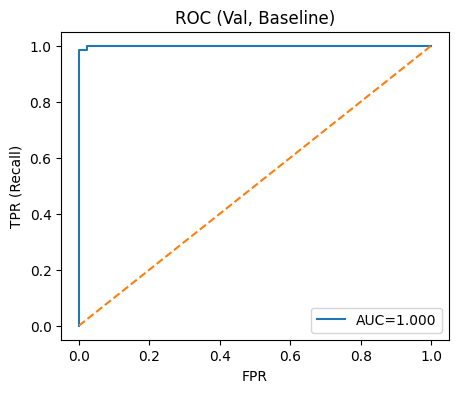

이 그림은 검증(Validation) 데이터에서의 ROC(Receiver Operating Characteristic) 곡선입니다. 
- **X축(FPR)**: False Positive Rate(위양성률, 1-Specificity)
- **Y축(TPR)**: True Positive Rate(재현율, Recall)
- **곡선 아래 면적(AUC)**: 1.0에 매우 가까우며, 이는 모델이 거의 완벽하게 분류하고 있음을 의미합니다.
- **점선**: 무작위 분류기의 기준선(대각선)

곡선이 왼쪽 위 모서리에 가까울수록(즉, AUC가 1에 가까울수록) 분류 성능이 우수함을 의미합니다.

## 그림 2: 검증 데이터 PR 곡선 해설

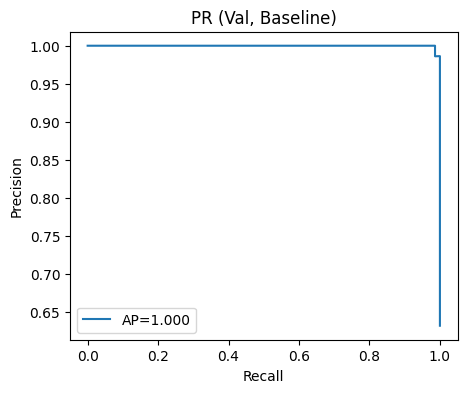

이 그림은 검증 데이터에서의 PR(Precision-Recall) 곡선입니다.
- **X축(Recall)**: 재현율(민감도)
- **Y축(Precision)**: 정밀도
- **AP(평균 정밀도)**: 1.0에 매우 가까움

PR 곡선이 오른쪽 위에 위치할수록, 즉 정밀도와 재현율을 모두 높게 유지할수록 모델의 분류 성능이 뛰어남을 의미합니다. 이 모델은 거의 완벽한 분류를 보여줍니다.

## 그림 3: 테스트 데이터 ROC 곡선 해설

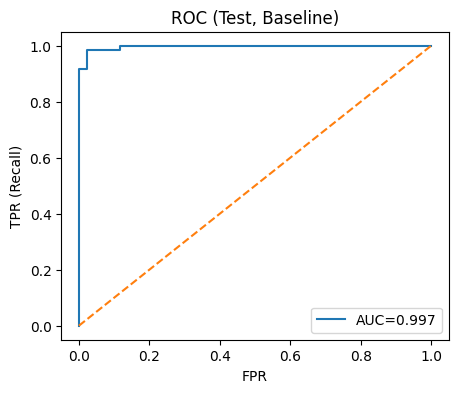

테스트(Test) 데이터에서의 ROC 곡선입니다.
- **AUC=0.997**로, 검증 데이터와 거의 유사한 매우 높은 분류 성능을 보입니다.
- 곡선이 대각선보다 훨씬 위쪽에 위치해 있어, 실제로도 우수한 일반화 성능을 확인할 수 있습니다.

## 그림 4: 테스트 데이터 PR 곡선 해설

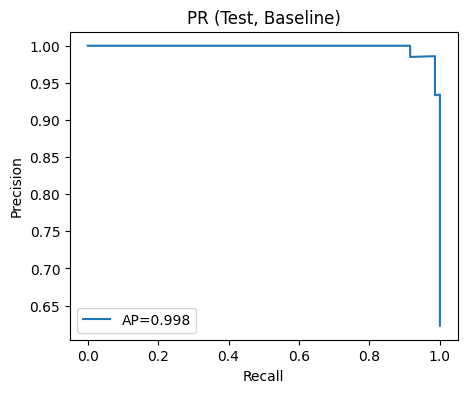

테스트 데이터에서의 PR 곡선입니다.
- **AP=0.998**로, 정밀도와 재현율 모두 거의 완벽하게 유지되고 있음을 알 수 있습니다.
- 실제 현업에서는 불균형 데이터에서 PR 곡선이 ROC보다 더 중요한 경우가 많으므로, 이 결과는 매우 우수하다고 볼 수 있습니다.

## 그림 5: 테스트 데이터 혼동 행렬 해설

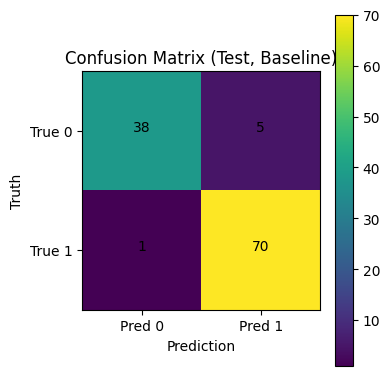

테스트 데이터에서의 혼동 행렬(Confusion Matrix)입니다.
- **True 0/Pred 0**: 38개 (정상 샘플을 올바르게 예측)
- **True 0/Pred 1**: 5개 (정상 샘플을 이상으로 잘못 예측)
- **True 1/Pred 0**: 1개 (이상 샘플을 정상으로 잘못 예측)
- **True 1/Pred 1**: 70개 (이상 샘플을 올바르게 예측)

오분류가 극히 적으며, 특히 이상(1) 샘플의 재현율이 매우 높아 실제 응용에서 신뢰할 수 있는 결과임을 알 수 있습니다.

---

다음 단계에서는 불균형 데이터 대응(예: pos_weight, Focal Loss 등) 실험을 진행하여 성능 변화를 비교해보겠습니다.

# 가중치(Weight)와 딥러닝 학습의 4단계

딥러닝에서 "모델이 학습한다"는 것은 단순히 데이터를 입력받아 예측하는 것 이상입니다. 실제로는 모델의 파라미터(가중치와 편향, 즉 weight와 bias)를 데이터에 맞게 조정하여, 주어진 문제에서 오차(손실, Loss)를 최소화하는 방향으로 점진적으로 개선하는 과정입니다.

이 과정이 왜 중요한가요?
- **모델의 성능은 파라미터에 의해 결정**됩니다. 파라미터가 올바르게 조정되어야만, 모델이 데이터의 패턴을 잘 파악할 수 있습니다.
- **손실 함수(Loss Function)**는 모델의 예측이 실제 정답과 얼마나 다른지 수치적으로 평가합니다. 이 값이 작아질수록 모델이 문제를 잘 푸는 것입니다.

이 학습 과정은 다음과 같은 4단계로 이루어집니다:

1. **Forward Pass(순전파)**
    - 입력 데이터를 모델에 통과시켜 예측값(\(\hat{y}\))을 계산합니다.
    - 이 과정은 실제 추론(inference)과 거의 동일합니다.

2. **Loss 계산**
    - 예측값과 실제값의 차이를 손실 함수로 계산합니다.
    - 대부분의 경우, 이 값은 하나의 스칼라(scalar) 값으로 나타납니다.

3. **Backward Pass(역전파)**
    - 손실 값을 각 파라미터에 대한 기울기(Gradient)로 변환합니다.
    - 직접 미분을 하는 대신, 연쇄법칙(Chain Rule)을 사용하여 효율적으로 계산합니다.

4. **Update(업데이트)**
    - 계산된 기울기를 이용해 파라미터를 조정합니다.
    - 이 과정을 경사 하강법(Gradient Descent)이라고 부릅니다.

이제 실제로 이 과정을 코드로 어떻게 구현하는지 살펴보겠습니다.

In [ ]:
# 에폭(epoch)만큼 전체 학습을 반복합니다
for epoch in range(EPOCHS):
    # 데이터셋을 배치(batch) 단위로 나누어 반복
    for batch in data:
        # 1. 배치 데이터에서 입력(x)과 정답(y) 분리
        x = batch[0]  # 입력 데이터
        y = batch[1]  # 실제 정답 레이블

        # 2. 순전파(Forward Pass): 입력을 모델에 넣어 예측값 계산
        y_pred = model(x)

        # 3. 손실(Loss) 계산: 예측값과 실제값의 차이 계산
        # PyTorch에서는 손실 함수를 관습적으로 criterion이라고 부릅니다
        loss = criterion(y_pred, y)

        # 4. 기존에 계산된 기울기(gradient) 초기화
        optimizer.zero_grad()

        # 5. 역전파(Backward Pass): 손실을 각 파라미터에 대한 기울기로 변환
        loss.backward()

        # 6. 파라미터(가중치) 업데이트: 경사 하강법을 통해 파라미터 조정
        optimizer.step()

# 다음: 경사 하강법(Gradient Descent)의 원리와 다양한 변형에 대해 이론적으로 살펴봅니다

## 경사 하강법(Gradient Descent)의 원리와 종류

딥러닝 모델은 입력 x가 주어졌을 때, y를 예측하는 복잡한 함수로 볼 수 있습니다. 예를 들어, 가장 단순한 형태는 다음과 같습니다:

$$
y = w \cdot x
$$

여기서 w는 파라미터(가중치, weight)입니다. 하지만 실제 딥러닝 모델은 훨씬 더 복잡한 구조와 수많은 파라미터를 가집니다.

### 왜 경사 하강법이 필요한가?
- 모델의 손실 함수(Loss)가 최소가 되는 최적의 파라미터 w를 찾는 것이 목표입니다.
- 하지만 손실 함수가 복잡하고, 해석적으로 미분하여 해를 구하는 것이 불가능한 경우가 많습니다.
- 따라서, **경사 하강법(Gradient Descent)**은 손실 함수의 기울기를 따라 파라미터를 조금씩 조정하여, 점진적으로 최소값에 접근하는 방법입니다.

이 과정을 수식으로 표현하면 다음과 같습니다:

$$
w = w - \eta \cdot \frac{\partial L}{\partial w}
$$

여기서,
- w: 파라미터(가중치)
- \(\eta\): 학습률(learning rate) — 한 번에 얼마나 이동할지 결정
- \(\frac{\partial L}{\partial w}\): 손실 함수 L을 w로 미분한 값(기울기)

### 경사 하강법의 종류와 특징
데이터를 어떻게 묶어서 학습하느냐에 따라 경사 하강법은 다음과 같이 나뉩니다:

| **방식** | **특징** | **장점** | **단점** |
| --- | --- | --- | --- |
| **Batch GD(배치 경사 하강법)** | 전체 데이터로 한 번에 업데이트 | 수렴이 안정적 | 데이터가 크면 속도가 느림 |
| **SGD(확률적 경사 하강법)** | 1개 샘플로 업데이트 | 빠른 업데이트 | 손실 값이 많이 변동함 |
| **Mini-batch SGD(미니배치 경사 하강법)** | 소규모 데이터 묶음으로 업데이트 | 속도와 안정성의 균형 | 배치 크기 선택이 필요함 |

이제 실제로 간단한 실습을 통해 경사 하강법이 어떻게 적용되는지 살펴보겠습니다.

# 실습 안내

이제 실제로 경사 하강법을 적용하여 딥러닝 모델을 학습하는 실습을 진행하겠습니다.

실습에서는 가장 기본적인 설정(Baseline)으로 시작하여, 이후 다양한 하이퍼파라미터와 기법을 실험해볼 수 있습니다.

먼저, 실습에 사용할 기본 환경과 설정을 소개합니다.

## Baseline 실험 환경

- **Optimizer(최적화 기법)**: SGD(확률적 경사 하강법, Stochastic Gradient Descent), momentum=0.0
- **Dropout(드롭아웃)**: 0.0 (사용하지 않음)
- **Scheduler(스케줄러)**: 사용하지 않음 (학습률 고정)
- **Dataset(데이터셋)**: MNIST (손글씨 숫자 이미지 데이터)
- **Model(모델)**: 간단한 다층 퍼셉트론(MLP, Multi-Layer Perceptron)

이제, 위 설정을 바탕으로 실제 모델을 구현하고 학습을 시작해보겠습니다.

다음 단계에서는 MNIST 데이터셋을 불러오고, MLP 모델을 정의하는 코드를 작성합니다.

## 환경 설정 및 데이터 준비

딥러닝 실험에서 환경 설정과 데이터 준비는 매우 중요한 단계입니다. 실험의 재현성(reproducibility)과 효율적인 학습을 위해 다음과 같은 과정을 거칩니다.

1. **필요한 라이브러리 임포트**: 딥러닝, 데이터 처리, 시각화, 수학 연산 등 다양한 작업을 위해 여러 라이브러리를 불러옵니다.
2. **랜덤 시드 고정**: 실험 결과의 일관성을 위해 모든 난수 발생기의 시드를 고정합니다.
3. **디바이스 설정**: GPU가 사용 가능하면 GPU를, 그렇지 않으면 CPU를 사용하도록 설정합니다.
4. **MNIST 데이터셋 준비**: 손글씨 숫자 이미지 데이터셋인 MNIST를 불러오고, 전처리(transform) 및 DataLoader로 배치 단위로 나눕니다.

이제 각 단계를 코드로 살펴보고, 왜 이러한 설정이 필요한지 자세히 설명하겠습니다. 이후에는 본격적으로 모델을 설계하는 단계로 넘어갈 예정입니다.

In [ ]:
# 딥러닝 실험에 필요한 주요 라이브러리들을 임포트합니다.
import random  # 파이썬 내장 난수 생성기
import os      # 운영체제와 상호작용 (예: 파일 경로)
import math    # 수학 함수
import numpy as np  # 수치 연산을 위한 넘파이
import torch  # 파이토치(PyTorch) 딥러닝 프레임워크
from torch import nn  # 신경망(neural network) 모듈
from torch.utils.data import DataLoader  # 데이터 배치 처리를 위한 DataLoader
from torchvision import datasets, transforms  # 이미지 데이터셋과 변환(transform) 도구
import torch.nn.functional as F  # 신경망 함수 (예: 활성화 함수 등)
from torch.optim import SGD  # 확률적 경사 하강법(Stochastic Gradient Descent) 최적화기
import matplotlib.pyplot as plt  # 데이터 시각화
import pandas as pd  # 데이터 분석 및 테이블 처리

# 다음 단계: 실험의 재현성을 위해 랜덤 시드를 고정합니다.

In [ ]:
# 실험의 재현성(reproducibility)을 위해 모든 난수 발생기의 시드를 고정합니다.
SEED = 42  # 임의의 고정된 시드 값
random.seed(SEED)  # 파이썬 기본 랜덤 시드 고정
np.random.seed(SEED)  # 넘파이 랜덤 시드 고정
torch.manual_seed(SEED)  # 파이토치 CPU 시드 고정
torch.cuda.manual_seed_all(SEED)  # 파이토치 GPU 시드 고정

# 아래 두 줄은 파이토치의 연산 결과를 더욱 일관되게 만들어줍니다.
torch.backends.cudnn.deterministic = True  # 연산을 결정적으로 만듦 (속도 저하 가능)
torch.backends.cudnn.benchmark = False  # 입력 크기가 고정되어 있다면 False로 설정

# 다음 단계: 사용할 연산 디바이스(GPU/CPU)를 자동으로 선택합니다.

In [ ]:
# 파이토치에서 사용할 디바이스를 자동으로 선택합니다.
# GPU가 사용 가능하면 GPU를, 아니면 CPU를 사용합니다.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 다음 단계: MNIST 데이터셋을 불러오고, 전처리 및 DataLoader로 준비합니다.

In [ ]:
# MNIST 데이터셋 준비 및 DataLoader 설정
# 1. 이미지를 텐서(tensor)로 변환하고, 평균과 표준편차로 정규화(normalization)합니다.
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 [0,1] 범위의 텐서로 변환
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST의 평균과 표준편차로 정규화
])

# 2. 학습용(train)과 테스트용(test) 데이터셋을 각각 불러옵니다.
train_ds = datasets.MNIST(root="./data", train=True, download=True, transform=transform)  # 학습 데이터셋
test_ds  = datasets.MNIST(root="./data", train=False, download=True, transform=transform)  # 테스트 데이터셋

# 3. DataLoader를 이용해 데이터를 배치 단위로 나눕니다.
BATCH_SIZE = 128  # 학습 시 한 번에 처리할 데이터 개수
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=2, pin_memory=True)  # 학습용 DataLoader
# 테스트는 더 큰 배치로 빠르게 평가
test_loader  = DataLoader(test_ds,  batch_size=512,  shuffle=False, num_workers=2, pin_memory=True)  # 테스트용 DataLoader

# 다음 단계: 이제 본격적으로 신경망 모델을 설계하는 단계로 넘어갑니다.

## 모델 설계 시작

이제 데이터 준비가 끝났으니, 신경망 모델을 직접 설계하는 단계로 넘어가겠습니다. 
다음 셀에서는 MNIST 숫자 분류를 위한 신경망 구조를 정의하고, 각 계층이 어떤 역할을 하는지 깊이 있게 설명할 예정입니다.

## MLP(다층 퍼셉트론) 모델 클래스 구현

딥러닝에서 MLP(Multi-Layer Perceptron, 다층 퍼셉트론)는 입력 데이터를 여러 개의 완전 연결(fully connected, 선형) 계층을 거치며 점진적으로 추상화하는 기본적인 신경망 구조입니다. MLP는 이미지, 텍스트 등 다양한 데이터의 특징(feature)을 학습할 수 있습니다.

여기서는 MNIST와 같은 28x28 크기의 흑백 이미지 분류를 위해 MLP 모델을 직접 구현합니다. 드롭아웃(Dropout) 기법도 포함하여 과적합(overfitting)을 방지합니다.

이제 아래 코드에서 MLP 클래스를 어떻게 설계하는지 살펴보겠습니다. 다음 셀에서는 모델의 forward(순전파) 과정을 포함한 전체 구조를 구현합니다.

In [ ]:
# MLP(다층 퍼셉트론) 모델 클래스 정의
class MLP(nn.Module):
    def __init__(self, dropout_p=0.0):
        super().__init__()
        # 입력 이미지를 1차원 벡터로 평탄화 (28x28 → 784)
        self.flatten = nn.Flatten()
        # 첫 번째 완전 연결 계층: 입력 784 → 512차원
        self.fc1 = nn.Linear(28*28, 512)
        # 두 번째 완전 연결 계층: 512 → 256차원
        self.fc2 = nn.Linear(512, 256)
        # 세 번째 완전 연결 계층: 256 → 10차원 (클래스 개수)
        self.fc3 = nn.Linear(256, 10)
        # 드롭아웃 계층: 과적합 방지를 위해 일부 뉴런을 무작위로 비활성화
        self.drop = nn.Dropout(p=dropout_p)
        # 드롭아웃 확률 저장
        self.p = dropout_p

    def forward(self, x):
        # 입력 이미지를 1차원 벡터로 변환
        x = self.flatten(x)
        # 첫 번째 계층 + ReLU 활성화 함수 적용
        x = F.relu(self.fc1(x))
        # 드롭아웃 적용 (드롭아웃 확률이 0보다 클 때만)
        if self.p > 0: x = self.drop(x)
        # 두 번째 계층 + ReLU 활성화 함수 적용
        x = F.relu(self.fc2(x))
        # 드롭아웃 적용
        if self.p > 0: x = self.drop(x)
        # 마지막 계층: 클래스별 로짓(logit) 출력
        x = self.fc3(x)
        return x

# 다음 단계: 모델의 성능을 평가할 수 있는 정확도(accuracy) 계산 함수를 구현합니다.

## 분류 모델의 정확도(Accuracy) 계산 함수

모델이 얼마나 잘 예측하는지 평가하려면, 예측값과 실제 정답이 얼마나 일치하는지 측정해야 합니다. 분류 문제에서는 일반적으로 '정확도(accuracy)'를 사용합니다. 정확도는 전체 샘플 중에서 모델이 정답을 맞춘 비율을 의미합니다.

아래 함수는 모델의 출력(logits)에서 가장 높은 값을 가진 클래스를 예측값으로 간주하고, 실제 정답과 비교하여 정확도를 계산합니다.

이제 코드로 정확도 계산 함수를 살펴봅시다.

In [ ]:
# 분류 문제에서 정확도(accuracy) 계산 함수 정의
# logits: 모델의 출력(미가공 점수), y: 실제 정답 레이블
def accuracy_from_logits(logits, y):
    # argmax(dim=1): 각 샘플별로 가장 큰 값을 가진 클래스 인덱스 추출
    # 예측값과 실제값이 같은지 비교하여 True/False로 반환
    # float()로 변환 후 평균을 내어 정확도(비율) 계산
    return (logits.argmax(dim=1) == y).float().mean().item()

# 다음 단계: 모델을 평가하는 전체 평가 루프(evaluate 함수)를 구현합니다.

## 모델 평가 함수(evaluate) 구현

모델의 성능을 검증 데이터셋(또는 테스트 데이터셋)에서 평가할 때는, 학습과 달리 파라미터를 업데이트하지 않고 오로지 예측만 수행합니다. 이때는 드롭아웃 등 일부 계층이 평가 모드로 동작해야 하므로 `model.eval()`을 사용합니다.

아래 함수는 데이터로더에서 배치 단위로 데이터를 받아 모델의 평균 손실(loss)과 정확도(accuracy)를 계산합니다. 또한, 평가 중에는 파라미터가 변경되지 않도록 `@torch.no_grad()` 데코레이터를 사용합니다.

이제 평가 함수의 코드를 살펴보겠습니다.

In [ ]:
@torch.no_grad()  # 평가 시에는 그래디언트(미분값) 계산을 비활성화하여 메모리와 연산량 절약
def evaluate(model, loader):
    model.eval()  # 모델을 평가 모드로 전환 (드롭아웃/배치정규화 등 동작 방식 변경)
    total_loss, total_acc, total_cnt = 0.0, 0.0, 0  # 전체 손실, 정확도, 샘플 수 초기화
    for x, y in loader:
        x, y = x.to(device), y.to(device)  # 데이터를 GPU/CPU로 이동
        logits = model(x)  # 모델 예측값 계산
        loss = F.cross_entropy(logits, y)  # 손실 함수(크로스 엔트로피) 계산
        acc  = accuracy_from_logits(logits, y)  # 정확도 계산
        bs = x.size(0)  # 현재 배치 크기
        total_cnt  += bs  # 전체 샘플 수 누적
        total_loss += loss.item() * bs  # 손실값 누적 (평균을 내기 위해 배치별 곱)
        total_acc  += acc * bs  # 정확도 누적 (배치별 곱)
    # 전체 평균 손실과 정확도 반환
    return total_loss/total_cnt, total_acc/total_cnt

# 다음 단계: 학습 과정의 손실과 정확도 변화를 시각화하는 함수를 구현합니다.

## 학습 곡선 시각화 함수 구현

딥러닝 모델을 학습할 때, 에포크(epoch)별로 손실(loss)과 정확도(accuracy)가 어떻게 변하는지 시각화하면 학습이 잘 진행되고 있는지, 과적합(overfitting)이나 과소적합(underfitting)이 발생하는지 쉽게 파악할 수 있습니다.

아래 함수는 여러 실험 결과(예: 서로 다른 모델, 하이퍼파라미터 등)를 한 번에 비교할 수 있도록, 각 실험의 학습 이력(history)에서 검증 정확도와 검증 손실 곡선을 그려줍니다.

이제 코드로 학습 곡선 시각화 함수를 살펴보겠습니다.

In [ ]:
# 여러 실험의 학습 이력(history)을 받아 검증 정확도/손실 곡선을 시각화하는 함수
# histories: {실험이름: {'epoch': [...], 'val_acc': [...], 'val_loss': [...], ...}}
def plot_curves(histories, title_prefix=""):
    # (1) 검증 정확도 곡선 그리기
    plt.figure(figsize=(7,5))  # 그림 크기 설정
    for name, h in histories.items():
        plt.plot(h["epoch"], h["val_acc"], label=name)  # 각 실험의 에포크별 검증 정확도
    plt.title(f"{title_prefix} - Validation Accuracy")  # 제목
    plt.xlabel("Epoch")  # x축: 에포크
    plt.ylabel("Acc")    # y축: 정확도
    plt.legend()         # 범례
    plt.grid(True)       # 격자
    plt.show()

    # (2) 검증 손실 곡선 그리기
    plt.figure(figsize=(7,5))
    for name, h in histories.items():
        plt.plot(h["epoch"], h["val_loss"], label=name)  # 각 실험의 에포크별 검증 손실
    plt.title(f"{title_prefix} - Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# 다음 단계: 실제로 모델을 학습시키는 학습 루프(train_one 함수)를 구현합니다.

## 모델 학습 함수(train_one) 구현

딥러닝 모델을 학습시키는 과정은 다음과 같이 이루어집니다:
1. 데이터 배치별로 입력을 받아 예측값을 계산합니다.
2. 예측값과 실제 정답을 비교하여 손실(loss)을 계산합니다.
3. 손실을 기준으로 역전파(backpropagation)를 통해 파라미터의 그래디언트(기울기)를 구합니다.
4. 옵티마이저(optimizer)를 사용해 파라미터를 업데이트합니다.
5. 정기적으로 검증 데이터셋에서 모델 성능을 평가합니다.

아래 함수는 위 과정을 에포크(epoch) 단위로 반복하며, 각 에포크마다 학습/검증 손실과 정확도를 기록합니다. 또한, 그래디언트 클리핑(gradient clipping) 옵션도 지원하여, 그래디언트 폭주(exploding gradient)를 방지할 수 있습니다.

이제 코드로 학습 루프를 살펴보겠습니다.

In [ ]:
# 모델을 한 번 학습(train)시키는 함수 정의
# model: 학습할 모델, optimizer: 옵티마이저, epochs: 에포크 수, clip_maxnorm: 그래디언트 클리핑 최대값
# 반환값: 에포크별 손실/정확도 기록 (history)
def train_one(model, optimizer, epochs=6, clip_maxnorm=None):
    # 학습 이력 저장용 딕셔너리 초기화
    hist = {"epoch": [], "train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
    for ep in range(1, epochs+1):
        model.train()  # 모델을 학습 모드로 전환 (드롭아웃/배치정규화 등 동작 방식 변경)
        t_loss, t_acc, t_cnt = 0.0, 0.0, 0  # 학습 손실, 정확도, 샘플 수 초기화
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)  # 데이터를 GPU/CPU로 이동
            logits = model(x)  # 모델 예측값 계산
            loss = F.cross_entropy(logits, y)  # 손실 함수(크로스 엔트로피) 계산

            optimizer.zero_grad(set_to_none=True)  # 기존 그래디언트 초기화
            loss.backward()  # 역전파로 그래디언트 계산

            # 그래디언트 클리핑: 그래디언트가 너무 커지는 현상 방지
            if clip_maxnorm is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), clip_maxnorm)

            optimizer.step()  # 파라미터 업데이트

            bs = x.size(0)  # 현재 배치 크기
            t_cnt  += bs  # 전체 샘플 수 누적
            t_loss += loss.item() * bs  # 손실값 누적 (평균을 내기 위해 배치별 곱)
            t_acc  += accuracy_from_logits(logits, y) * bs  # 정확도 누적 (배치별 곱)

        # 한 에포크가 끝나면 검증 데이터셋에서 성능 평가
        vl, va = evaluate(model, test_loader)
        # 학습 및 검증 이력 기록
        hist["epoch"].append(ep)
        hist["train_loss"].append(t_loss/t_cnt)
        hist["train_acc"].append(t_acc/t_cnt)
        hist["val_loss"].append(vl)
        hist["val_acc"].append(va)
        # 에포크별 진행상황 출력
        print(f"Epoch {ep:02d} | train_loss={t_loss/t_cnt:.4f} acc={t_acc/t_cnt:.4f} | val_loss={vl:.4f} acc={va:.4f}")
    return hist

# 다음 단계: 위에서 구현한 함수들을 활용하여 실제로 모델을 학습시키고, 결과를 시각화해보겠습니다.

## 하이퍼파라미터 실험: 학습률(Learning Rate) 변화의 영향

딥러닝 모델의 성능은 하이퍼파라미터(hyperparameter) 설정에 크게 좌우됩니다. 그 중에서도 **학습률(learning rate)**은 모델이 얼마나 빠르고 안정적으로 최적점에 수렴하는지 결정하는 핵심 변수입니다. 

이번 실험의 목적은 다음과 같습니다:
- **학습률만을 변화**시키고, 나머지 조건은 모두 고정하여 모델의 성능 변화를 관찰합니다.
- 이를 통해 적절한 학습률 선택이 왜 중요한지, 너무 크거나 작을 때 어떤 현상이 발생하는지 체험합니다.

### 실험 조건
- **고정 변수**
    - 옵티마이저(optimizer): SGD(모멘텀 없음, momentum=0.0)
    - 드롭아웃(dropout): 없음(0.0)
    - 스케줄러(scheduler): 없음
    - 에폭(epoch): 6
- **독립 변수**
    - 학습률(learning rate): 0.001, 0.01, 0.1

이제 실제로 세 가지 학습률로 모델을 각각 학습시키고, 결과를 비교해보겠습니다.

In [ ]:
# 실험 반복 횟수(에폭 수) 설정
EPOCHS = 6
# 실험할 학습률 리스트 정의
LR_LIST = [1e-3, 1e-2, 1e-1]

# 결과 저장용 딕셔너리 및 요약 리스트 초기화
histories = {}  # 각 실험의 학습 이력 저장
summary = []    # 각 실험의 마지막 성능 요약 저장

# 학습률별로 반복 실험
for lr in LR_LIST:
    name = f"lr : {lr}"  # 실험 이름 지정
    print(f"\n{name}")
    # 1. 모델 초기화 (드롭아웃 없음)
    model = MLP(dropout_p=0.0).to(device)
    # 2. 옵티마이저 설정 (SGD, 지정한 학습률)
    optim = SGD(model.parameters(), lr=lr)
    # 3. 모델 학습 및 검증 (train_one 함수 사용)
    hist = train_one(model, optim, epochs=EPOCHS)
    # 4. 학습 이력 저장
    histories[name] = hist
    # 5. 마지막 검증 정확도/손실 요약 저장
    summary.append({
        "name": name,
        "final_val_acc": hist["val_acc"][-1],
        "final_val_loss": hist["val_loss"][-1]
    })

# 학습 곡선(정확도/손실) 시각화
plot_curves(histories, title_prefix="LR Sweep (SGD, no dropout/scheduler)")

# 실험별 마지막 검증 성능을 표로 정리
summary_df = pd.DataFrame(summary).sort_values(by="final_val_acc", ascending=False).reset_index(drop=True)
summary_df

# 다음 단계: 시각화된 결과(정확도/손실 곡선)와 요약 표를 해석하고, 어떤 학습률이 가장 효과적인지 분석합니다.

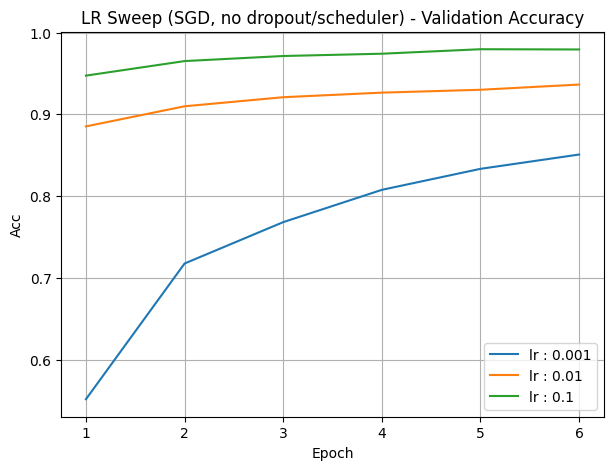

### 그림 6: 학습률별 검증 정확도 변화
이 그래프는 에폭(epoch)이 진행됨에 따라 세 가지 학습률(0.001, 0.01, 0.1)에서 검증 정확도(validation accuracy)가 어떻게 변화하는지를 보여줍니다.

- **lr=0.001**: 느리게 상승하지만, 6에폭 이후에도 여전히 다른 학습률에 비해 낮은 정확도를 보입니다. 학습이 너무 느려 충분히 수렴하지 못한 모습입니다.
- **lr=0.01**: 빠르게 정확도가 상승하며, 6에폭 시점에서 상당히 높은 정확도에 도달합니다. 안정적으로 수렴하는 이상적인 학습률로 보입니다.
- **lr=0.1**: 처음부터 매우 높은 정확도를 보이며, 에폭이 진행될수록 미세하게 더 상승합니다. 하지만 너무 큰 학습률은 때때로 불안정하거나 발산할 위험이 있으니, 실제로는 추가적인 실험이 필요합니다.

**핵심 메시지**: 학습률이 너무 작으면 학습이 느리고, 너무 크면 불안정할 수 있습니다. 적절한 학습률 선택이 모델 성능에 매우 중요합니다.

다음 그림에서는 검증 손실(validation loss)이 어떻게 변화하는지 살펴보겠습니다.

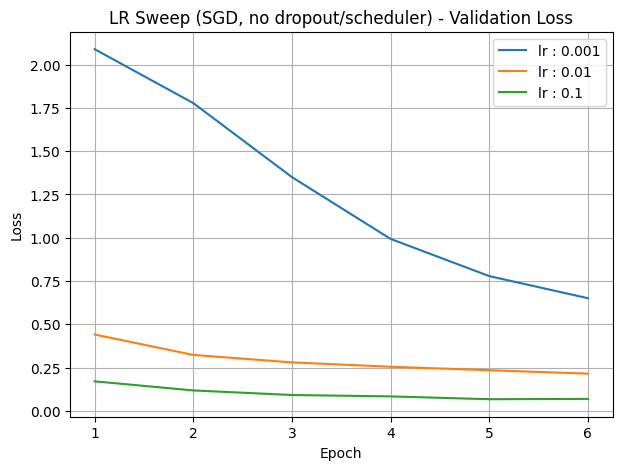

### 그림 7: 학습률별 검증 손실 변화
이 그래프는 에폭(epoch)별로 검증 손실(validation loss)이 어떻게 감소하는지 보여줍니다.

- **lr=0.001**: 손실이 점진적으로 감소하지만, 여전히 다른 학습률에 비해 높은 값을 유지합니다. 학습이 충분히 진행되지 않은 상태입니다.
- **lr=0.01**: 손실이 빠르게 감소하며, 적절한 수준에서 안정적으로 수렴합니다.
- **lr=0.1**: 매우 빠르게 손실이 감소하고, 가장 낮은 손실값에 도달합니다. 하지만 실제로는 너무 큰 학습률이 오버슈팅(overshooting)이나 발산(divergence)을 유발할 수 있으므로 주의가 필요합니다.

**핵심 메시지**: 손실 곡선 역시 적절한 학습률이 빠르고 안정적인 수렴에 중요함을 보여줍니다.

다음 단계에서는 표로 정리된 실험 결과를 바탕으로, 최적의 학습률을 선택하는 방법과 실제 적용 시 주의할 점을 정리하겠습니다.